## Import Necessary Libraries

In [126]:
import pandas as pd

import os

### Task 1: Merging 12 months of sales data into a single file

In [127]:
df= pd.read_csv("D:\\A Real World Data Science Task\\Sales_Data\\Sales_April_2019.csv")

# files=[file for file in os.listdir("D:\\A Real World Data Science Task\\Sales_Data")]

files = []
for file in os.listdir("D:\\A Real World Data Science Task\\Sales_Data"):
    files.append(file)
print(files)

all_months_data=pd.DataFrame()

for file in files:
    df= pd.read_csv("D:\\A Real World Data Science Task\\Sales_Data\\"+file)
    all_months_data=pd.concat([all_months_data,df])
    
all_months_data.to_csv("All_Data.csv",index=False)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


## Read in Updated DataFrame

In [128]:
all_data=pd.read_csv("All_Data.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [129]:
num_rows = all_data.shape[0]
num_cols = all_data.shape[1]
print(num_rows,num_cols)

186849 6


# Clean Up The Data

## Try to find where is the missing values 

In [130]:
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,04/02/2019 7:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,04/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,04/08/2019 14:05,"83 7th St, Boston, MA 02215"


## Show all the NaN values

In [131]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.tail(50)
#nan_df=all_data.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
171126,NaN,NaN,NaN,NaN,NaN,NaN
171160,NaN,NaN,NaN,NaN,NaN,NaN
172040,NaN,NaN,NaN,NaN,NaN,NaN
172331,NaN,NaN,NaN,NaN,NaN,NaN
172663,NaN,NaN,NaN,NaN,NaN,NaN
172703,NaN,NaN,NaN,NaN,NaN,NaN
173092,NaN,NaN,NaN,NaN,NaN,NaN
173552,NaN,NaN,NaN,NaN,NaN,NaN
173927,NaN,NaN,NaN,NaN,NaN,NaN
174306,NaN,NaN,NaN,NaN,NaN,NaN


## Drop rows of NaN

In [132]:
all_data=all_data.dropna(how='all')
all_data.tail(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186798,259310,Apple Airpods Headphones,1,150,09/15/19 19:08,"309 Elm St, Los Angeles, CA 90001"
186799,259311,Flatscreen TV,1,300,09/18/19 14:54,"930 North St, Seattle, WA 98101"
186800,259312,Wired Headphones,1,11.99,09/02/19 19:51,"573 Sunset St, San Francisco, CA 94016"
186801,259313,Bose SoundSport Headphones,1,99.99,09/05/19 11:34,"138 2nd St, Los Angeles, CA 90001"
186802,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186803,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186804,259315,Lightning Charging Cable,1,14.95,09/29/19 16:20,"112 5th St, Boston, MA 02215"
186805,259316,AAA Batteries (4-pack),1,2.99,09/16/19 16:48,"369 Johnson St, Atlanta, GA 30301"
186806,259317,Lightning Charging Cable,1,14.95,09/26/19 21:12,"151 1st St, New York City, NY 10001"
186807,259318,AAA Batteries (4-pack),1,2.99,09/30/19 10:05,"524 Hickory St, Boston, MA 02215"


#### Find Or and Delete it

In [133]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']


#### Convert column to the correct type 

In [134]:
all_data['Quantity Ordered'] =pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] =pd.to_numeric(all_data['Price Each'])

## Augment data with additional columns

### Task 2: Adding Month Column 

In [135]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Adding a sales Column

In [136]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
6,176563,Bose SoundSport Headphones,1,99.99,04/02/2019 7:46,"668 Center St, Seattle, WA 98101",4,99.99
7,176564,USB-C Charging Cable,1,11.95,04/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
9,176566,Wired Headphones,1,11.99,04/08/2019 14:05,"83 7th St, Boston, MA 02215",4,11.99


## Question 1--> What was the best month for sales? How much was earned that month?

In [137]:
temp_data=all_data.groupby('Month').sum()
temp_data

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


### Data Visualization Using Bar Charts

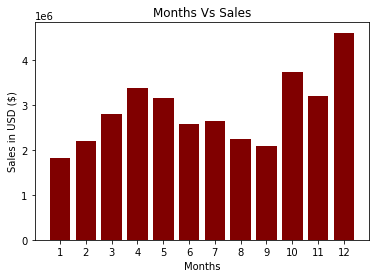

In [144]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD ($)")
plt.title("Months Vs Sales")
plt.bar(months,temp_data['Sales'],color='maroon')

plt.show()

In [139]:
print("December is the best month for sale: \n",temp_data.max())

December is the best month for sale: 
 Quantity Ordered      28114.00
Price Each          4588415.41
Sales               4613443.34
dtype: float64


## Question 2--> What was the worst month for sales? How much was earned that month?

In [140]:
print("January is the worst month for sale: \n",temp_data.min())

January is the worst month for sale: 
 Quantity Ordered      10903.00
Price Each          1811768.38
Sales               1822256.73
dtype: float64
